## Week10: Homework sample

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import xarray as xr
import cartopy.crs as ccrs
import scipy.stats as stats

In [2]:
# read data
df=pd.read_csv('./NINO34_annual_mean_1870_2020.txt', delimiter=" ")
Year=df.Year.values
nino34_year=df.NINO34_SST.values
df

,Year,NINO34_SST
0,1870.0,26.134167
1,1871.0,26.613333
2,1872.0,26.349167
3,1873.0,26.366667
4,1874.0,25.992500
...,...,...
146,2016.0,27.458333
147,2017.0,26.860000
148,2018.0,27.125000
149,2019.0,27.595000


In [3]:
x=Year
y=nino34_year
N = np.size(x)     # number of data points
c=np.fft.fft(y) # apply FFT

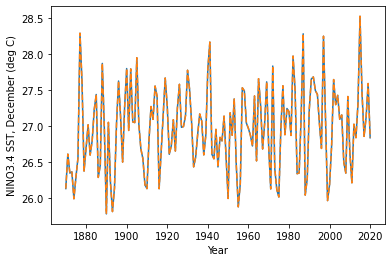

In [4]:
yest=np.fft.ifft(c)
fig=plt.figure()
plt.plot(x,y)
plt.plot(x,np.real(yest),'--')
plt.xlabel('Year')
plt.ylabel('NINO3.4 SST, December (deg C)')
plt.show()

In [5]:
#  get unique coefficients and frequency axis 
K=np.ceil((N+1)/2).astype(int) # set K = N/2+1
print(K)
c1=c[0:K]
freq=np.arange(0,1/2+0.5/N,1/N)

76


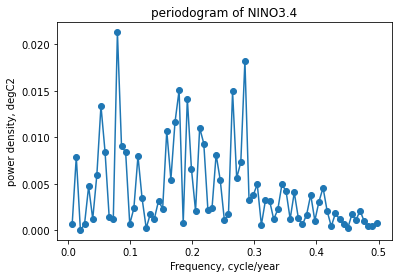

In [9]:
fig=plt.figure()
# calculate the power spectrum
P0=2*abs(c1[1:])**2/N/(N-1); # multiply by 2 because there are both positive and negative frequencies
freq0=freq[1:]; # discard the constant term (freq=0)

plt.plot(freq0,P0,'o-')
plt.xlabel('Frequency, cycle/year')
plt.ylabel('power density, degC2');
plt.title('periodogram of NINO3.4')

fn='Fig_nino34_annual_mean_FFT_periodogram'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)
plt.show()

In [69]:
freq
1/0.0794702

12.583333123611114

In [8]:
f_pass=1/10 # low pass filter to remove any frequencies higher than 1/10 cycle/year (period shorter than 10 years) 
ind_low_pass=np.where(freq0<f_pass)
N_low=np.size(ind_low_pass) # determine how many terms to include
print(str(N_low)+' terms')
# take the first N_low+1 (including the first term), and the last N_low terms
cX=0*c
cX[0:N_low+1]=c[0:N_low+1]
cX[-N_low:]=c[-N_low:]

15 terms


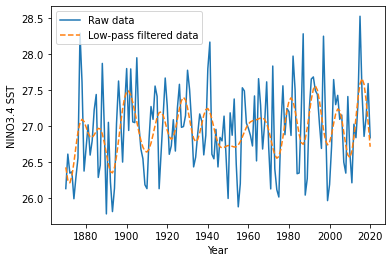

In [10]:
### inverse fft to reconstruct in time domain
yest=np.fft.ifft(cX)
fig=plt.figure()
plt.plot(x,y,label='Raw data')
plt.plot(x,np.real(yest),'--',label='Low-pass filtered data')
plt.xlabel('Year')
plt.ylabel('NINO3.4 SST')
plt.legend()

fn='Fig_nino34_annual_mean_FFT_10year_low_pass'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)

plt.show()